In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
, GridSearchCV, ParameterGrid
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import xgboost as xgb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/MSalah11GB/AIProject/main/Bengaluru_House_Data.csv'
df = pd.read_csv(url)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [ ]:
#not all values are numbers, there is an range in string format
import re

def stringRangeToNumber(x):

    if( isinstance(x,(int,float)) ):
        return float(x)
    elif(isinstance(x, (str))):
        numbers = re.findall(r'\d+', x)
        if(len(numbers) == 1):
            return float(numbers[0])
        elif(len(numbers) == 2):
            n1 = float(numbers[0])
            n2 = float(numbers[1])
            avg = (n1+n2)/2
            return avg
        else:
            return 0

df2 = df.copy()
df2['total_sqft'] = df2['total_sqft'].apply(stringRangeToNumber)
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [ ]:
print(df2.iloc[410])

area_type       Super built-up  Area
availability           Ready To Move
location                     Kengeri
size                           1 BHK
society                          NaN
total_sqft                      40.0
bath                             1.0
balcony                          0.0
price                           18.5
Name: 410, dtype: object


In [ ]:
df2['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df2['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [ ]:
df3 = df2.drop(['society'],axis='columns')
df4 = df3.drop(['area_type'],axis='columns')
df5 = df4.drop(['availability'],axis='columns')

df6 = df5.copy()
df6 = df5.dropna(subset=['size'])

def getSize(x):
    numbers = re.findall(r'\d+', x)
    return int(numbers[0])

df7 = df6.copy()
df7['size'] = df7['size'].apply(getSize)

df8 = df7[df7['bath'] <= df7['size']+1 ]

df9 = df8.dropna(subset=['balcony'])
df9.drop(['balcony'],axis=True, inplace=True)

#print(df9[''].dtype)

In [ ]:
df9 = df9[df9['total_sqft']/df9['size']>300]
df9['price_per_sqft'] = df9['price']*100000/df9['total_sqft']
df9['total_sqft'] = pd.to_numeric(df9['total_sqft'], errors='coerce')
# df9 = df9.dropna()
df9.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


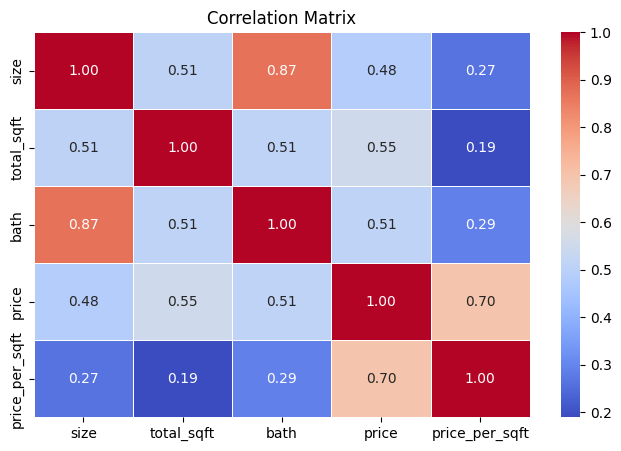

In [ ]:
numeric_df = df9.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

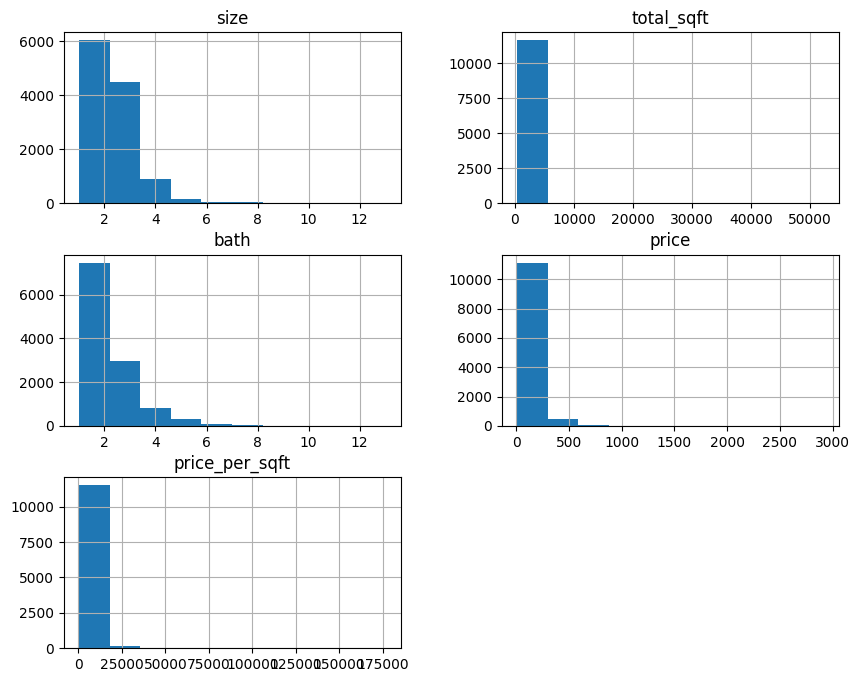

In [ ]:
df9.hist(figsize=(10,8))
plt.show()

In [ ]:
df9['location'].value_counts()

location
Whitefield             508
Sarjapur  Road         364
Electronic City        291
Kanakpura Road         250
Thanisandra            227
                      ... 
Escorts Colony           1
Rahat Bagh               1
Jayamahal Extension      1
Hallehalli               1
Abshot Layout            1
Name: count, Length: 1149, dtype: int64

In [ ]:
repetationLocation = df9['location'].value_counts()
repetationLocationNeeded = repetationLocation[repetationLocation>10]
def convertToOther(loc):
    if(loc in repetationLocationNeeded):
        return loc
    else:
        return 'others'

df10 = df9.copy()
df10['location'] = df10['location'].apply(convertToOther)

from pandas import get_dummies
dummies = get_dummies(df10['location'])
df10 = pd.concat([df10, dummies],axis='columns')
df10.drop(['others'], axis='columns',inplace=True)
df10.head()

,location,size,total_sqft,bath,price,price_per_sqft,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,2,1200.0,2.0,51.00,4250.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11 = pd.DataFrame()
for key,subdf in df10.groupby('location'):
    meanPrice = subdf['price_per_sqft'].mean()
    stdPrice = subdf['price_per_sqft'].std()
    newSubdf = subdf[(subdf['price_per_sqft'] < meanPrice+stdPrice) & (subdf['price_per_sqft'] > meanPrice-stdPrice) ]
    df11 = pd.concat([newSubdf,df11], ignore_index=True)

df11.head()
df12 = df11.drop(['location'],axis='columns')

df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 222 entries, size to Yeshwanthpur
dtypes: bool(217), float64(4), int64(1)
memory usage: 2.4 MB


In [ ]:
X = df12.drop(['price'],axis='columns')
y = df12['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

4.1 ElasticNet regression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'alpha': [0.01, 0.1, 1.0],    # 0.1
    'l1_ratio': [0.1, 0.5, 0.9]   # 0.5
}
elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose = 1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}


In [ ]:
y_pred1 = best_estimator.predict(X_test_scaled)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred1)
mape = mean_absolute_percentage_error(y_test, y_pred1)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("MAPE:", mape)

MAE: 7.725507234653208
MSE: 267.45152885971254
RMSE: 16.353945360667943
R2 Score: 0.9424734289462032
MAPE: 12.412619637831094


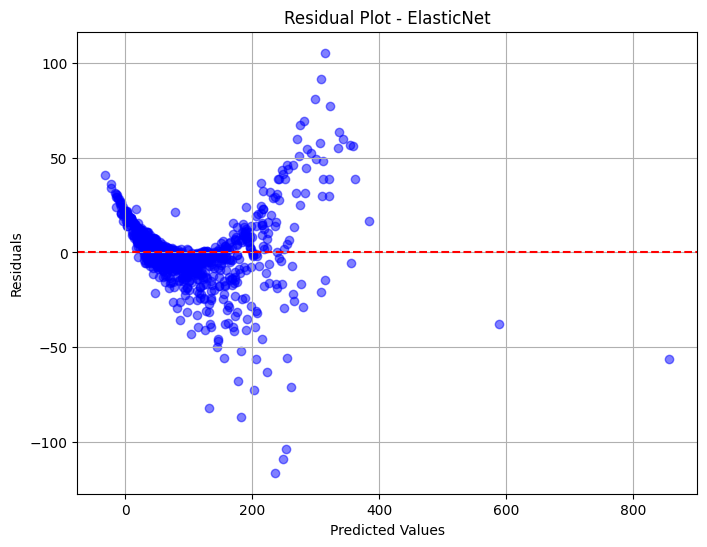

In [ ]:
residuals = y_test - y_pred1
max_residual = 150
res_1 = residuals[abs(residuals) < max_residual]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred1[abs(residuals) < max_residual], res_1, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - ElasticNet')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
comparison_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
comparison_elastic_net.head(10)

,Actual,Predicted
554,42.18,35.619997
3988,62.00,64.852011
7609,61.26,67.094308
4578,70.00,67.577963
533,51.00,47.486222
8891,120.00,119.554640
8949,150.00,173.112699
8410,70.00,70.650539
3481,61.00,57.414170
2998,157.00,158.870522


4.2 Decision Tree

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, None],     # None
    'min_samples_split': [2, 5, 10],  # 2
    'min_samples_leaf': [1, 2, 4]     # 1
}

dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_
y_pred2 = best_estimator.predict(X_test)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("MAPE:", mape)

MAE: 1.9086620082815735
MSE: 594.3668520056937
RMSE: 24.379640112308746
R2 Score: 0.8721566966182426
MAPE: 1.3164471612496338


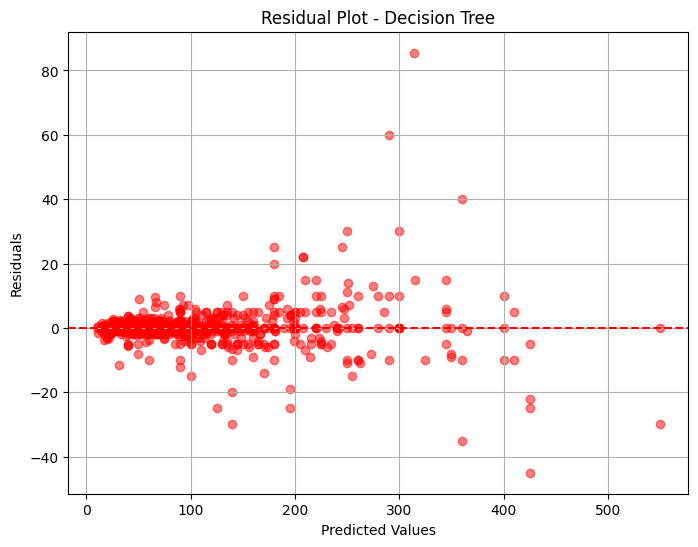

In [ ]:
residuals = y_test - y_pred2
max_residual = 100
res_2 = residuals[abs(residuals) < max_residual]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred2[abs(residuals) < max_residual], res_2, color='red', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
comparison_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
comparison_elastic_net.head(10)

,Actual,Predicted
554,42.18,43.00
3988,62.00,59.00
7609,61.26,61.25
4578,70.00,70.00
533,51.00,51.00
8891,120.00,121.00
8949,150.00,150.00
8410,70.00,70.00
3481,61.00,62.00
2998,157.00,160.00


4.3 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # 300
    'max_depth': [3, 5, 7, None],     # None
    'min_samples_split': [2, 5, 10],  # 2
    'min_samples_leaf': [1, 2, 4]     # 1
}
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose = 2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_
y_pred3 = best_estimator.predict(X_test)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=3, min_samples_lea

In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred3)
mape = mean_absolute_percentage_error(y_test, y_pred3)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("MAPE:", mape)

MAE: 1.0956338768115952
MSE: 122.12642854026079
RMSE: 11.051082686337153
R2 Score: 0.9737316339191582
MAPE: 0.7519904898453685


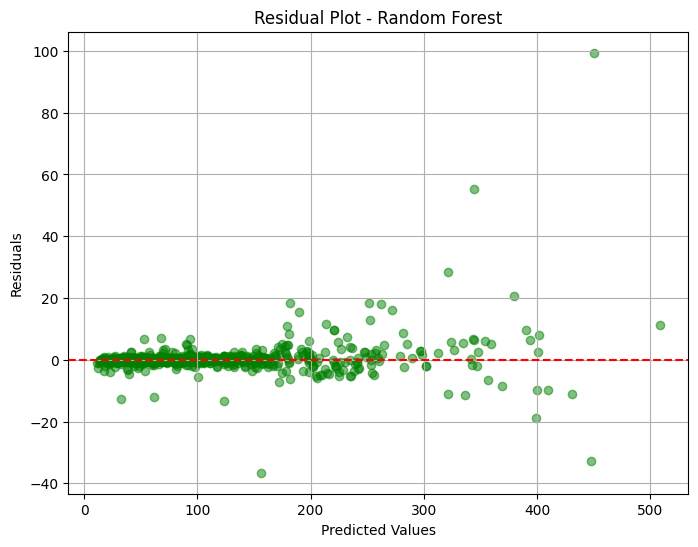

In [ ]:
residuals = y_test - y_pred3
max_residual = 100
res_3 = residuals[abs(residuals) < max_residual]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred3[abs(residuals) < max_residual], res_3, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
comparison_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
comparison_elastic_net.head(10)

,Actual,Predicted
554,42.18,42.35435
3988,62.00,61.62025
7609,61.26,61.15610
4578,70.00,70.00500
533,51.00,50.95165
8891,120.00,119.91500
8949,150.00,148.70000
8410,70.00,70.06455
3481,61.00,61.11605
2998,157.00,158.09000


4.4 Gradient Boosting

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],     # 200
    'learning_rate': [0.05, 0.1, 0.2],  # 0.1
    'max_depth': [3, 4, 5],           # 3
    'min_samples_split': [2, 5, 10],  # 10
    'min_samples_leaf': [1, 2, 4],    # 2
    'max_features': ['sqrt', 'log2', 'auto']  # auto
}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose = 2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_
y_pred4 = best_estimator.predict(X_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred4)
mape = mean_absolute_percentage_error(y_test, y_pred4)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("MAPE:", mape)

MAE: 2.3991219150523433
MSE: 482.80388457978535
RMSE: 21.972798742531307
R2 Score: 0.8961529511917781
MAPE: 2.309797630226928


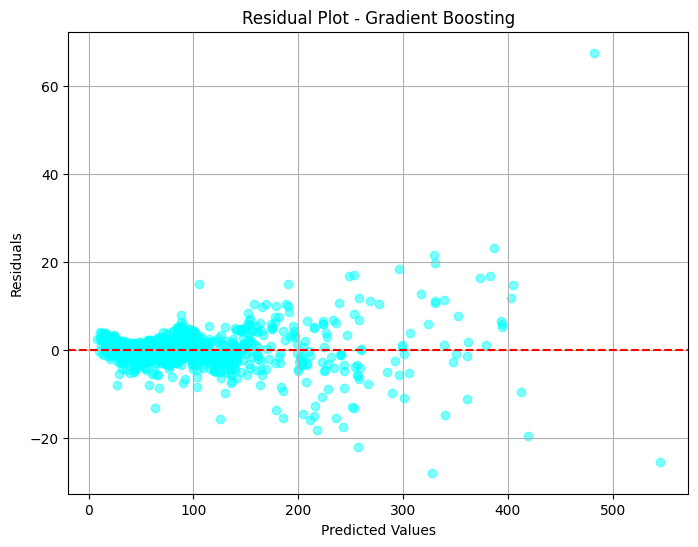

In [ ]:
residuals = y_test - y_pred4
max_residual = 100
res_4 = residuals[abs(residuals) < max_residual]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred4[abs(residuals) < max_residual], res_4, color='cyan', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - Gradient Boosting')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
comparison_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
comparison_elastic_net.head(10)

,Actual,Predicted
554,42.18,41.963329
3988,62.00,61.153859
7609,61.26,60.302930
4578,70.00,69.158062
533,51.00,51.224965
8891,120.00,126.348717
8949,150.00,145.812327
8410,70.00,70.231911
3481,61.00,60.007812
2998,157.00,150.996627


4.5 XGBoost

In [ ]:

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],    # 0.1
    'n_estimators': [100, 200, 300],        # 100
    'max_depth': [3, 5, 7]                  # 5
}

xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose = 2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_
y_pred5 = best_estimator.predict(X_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred5)
mape = mean_absolute_percentage_error(y_test, y_pred5)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("MAPE:", mape)


MAE: 2.363093311041285
MSE: 211.87130304308826
RMSE: 14.555799635990056
R2 Score: 0.9544282673547105
MAPE: 2.0897959028289823


In [ ]:
comparison_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
comparison_elastic_net.head(10)

,Actual,Predicted
554,42.18,42.538044
3988,62.00,60.991493
7609,61.26,62.595970
4578,70.00,70.077744
533,51.00,51.632378
8891,120.00,120.982079
8949,150.00,142.899200
8410,70.00,69.929008
3481,61.00,61.033184
2998,157.00,156.823166


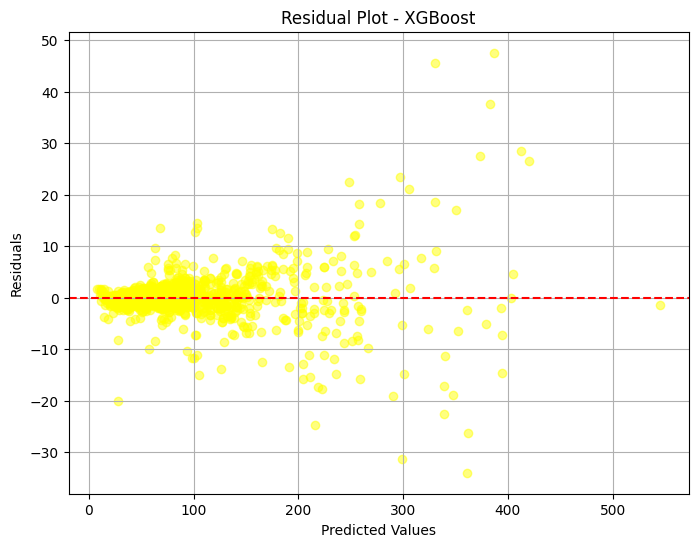

In [ ]:
residuals = y_test - y_pred5
max_residual = 100
res_5 = residuals[abs(residuals) < max_residual]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred4[abs(residuals) < max_residual], res_5, color='yellow', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
# Initialize an empty dictionary to hold evaluation metrics for each model
evaluation_data = {}

model_names = ["ElasticNet", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
y_preds = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]

# Iterate over your models and calculate evaluation metrics for each model
for model_name, y_pred in zip(model_names, y_preds):
    mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Add the evaluation metrics to the dictionary
    evaluation_data[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r_squared,
        "MAPE": mape
    }

# Convert the dictionary to a DataFrame
evaluation_df = pd.DataFrame(evaluation_data).T  # Transpose the DataFrame to have models as rows

# Print the DataFrame
evaluation_df

,MAE,MSE,RMSE,R2 Score,MAPE
ElasticNet,7.725507,267.451529,16.353945,0.942473,12.412620
Decision Tree,1.908662,594.366852,24.379640,0.872157,1.316447
Random Forest,1.095634,122.126429,11.051083,0.973732,0.751990
Gradient Boosting,2.399122,482.803885,21.972799,0.896153,2.309798
XGBoost,2.363093,211.871303,14.555800,0.954428,2.089796
